$$\LARGE\textbf{Information retrieval project}$$

### Mathieu Chalvidal 

06/05/2019

## 0 - Imports and settings 

In [930]:
## usefull packages 
import os
import re
import string
import numpy as np
import matplotlib.pyplot as plt
from nltk import word_tokenize
from nltk.corpus import stopwords

##ignorng warnings
import warnings
warnings.filterwarnings('ignore')

##setting NLP stopwords
stop = stopwords.words('english') + list(string.punctuation) + ['n']
stemmer = nltk.stem.SnowballStemmer('english')

##working directory 
os.chdir('/Users/chalvidalm/Documents/3A OMA/A.I./Information Retrieval /drive-download-20190227T130556Z-001/Project/CACM')


## 1 - Corpus

### 1 - 1 Raw data loading

In [931]:
with open('cacm.all') as f:
    data = f.read()  
data

'.I 1\n.T\nPreliminary Report-International Algebraic Language\n.B\nCACM December, 1958\n.A\nPerlis, A. J.\nSamelson,K.\n.N\nCA581203 JB March 22, 1978  8:28 PM\n.X\n100\t5\t1\n123\t5\t1\n164\t5\t1\n1\t5\t1\n1\t5\t1\n1\t5\t1\n205\t5\t1\n210\t5\t1\n214\t5\t1\n1982\t5\t1\n398\t5\t1\n642\t5\t1\n669\t5\t1\n1\t6\t1\n1\t6\t1\n1\t6\t1\n1\t6\t1\n1\t6\t1\n1\t6\t1\n1\t6\t1\n1\t6\t1\n1\t6\t1\n1\t6\t1\n165\t6\t1\n196\t6\t1\n196\t6\t1\n1273\t6\t1\n1883\t6\t1\n324\t6\t1\n43\t6\t1\n53\t6\t1\n91\t6\t1\n410\t6\t1\n3184\t6\t1\n.I 2\n.T\nExtraction of Roots by Repeated Subtractions for Digital Computers\n.B\nCACM December, 1958\n.A\nSugai, I.\n.N\nCA581202 JB March 22, 1978  8:29 PM\n.X\n2\t5\t2\n2\t5\t2\n2\t5\t2\n.I 3\n.T\nTechniques Department on Matrix Program Schemes\n.B\nCACM December, 1958\n.A\nFriedman, M. D.\n.N\nCA581201 JB March 22, 1978  8:30 PM\n.X\n3\t5\t3\n3\t5\t3\n3\t5\t3\n.I 4\n.T\nGlossary of Computer Engineering and Programming Terminology\n.B\nCACM November, 1958\n.N\nCA581103 JB March

### 2 - 1 NLP processing

#### Normalisation

In [932]:
split = re.split('.I ',data)
Info ={}
for i, element in enumerate(split):
    if len(re.findall('\d+',element[0:5]))>0:
        inde_ = re.findall('\d+',element[0:5])[0]
        Info[inde_]={}
        lines = re.split('\n',element)
        for k,line in enumerate(lines):
            if line[0:2] in ['.T','.W','.K']:
                j=1
                while k+j<len(lines):
                    if len(lines[k+j])==0 or lines[k+j][0]!='.':
                        j+=1
                    else:
                        break
                Info[inde_][line[0:2]] = ' '.join(lines[k+1:k+j])

Info

{'1461': {'.T': 'Discussion Summary on Operating Systems'},
 '161': {'.T': 'Abbreviating Words Systematically (Corrigendum)'},
 '694': {'.T': 'A Comparison of Disks and Tapes',
  '.W': 'The principal characteristics of current magnetic disks and tape units are summarized and compared.   Some of the characteristics of disk files are illustrated in a sorting example and compared to a tapesort.   The conclusion is presented that disk files are competitive to tapes in some important applications.'},
 '2466': {'.K': 'permutations, combination',
  '.T': 'Enumerating Combinations of m Out of n Objects [G6] (Algorithm A452)'},
 '609': {'.T': 'Permutation (Algorithm 71)'},
 '1007': {'.T': 'Extension of Existing Compilers By Sophisticated Use of Macros',
  '.W': 'A description is presented of an application in which macros and string concatenation were  employed to add a new facility to BELFAP.'},
 '687': {'.T': 'Shanks (Algorithm 215)'},
 '704': {'.T': 'Combinatorial of M Things Taken One At A 

#### Tokenization and stop-words removal

In [933]:
for key,value in Info.items():
    try:
        txt = re.sub(r'[^a-zA-Z0-9_]', ' ', value['.T'].lower())
        tokens = [terme for terme in re.split(' ',txt) if terme not in stop]
        tokens = [stemmer.stem(token) for token in tokens if len(token)>0]
        Info[key]['.T clean'] = tokens
        Info[key]['items clean'] = Info[key]['.T clean']
    except KeyError:
        pass  
    try:
        txt = re.sub(r'[^a-zA-Z0-9_]', ' ', value['.W'].lower())
        tokens = [terme for terme in re.split(' ',txt) if terme not in stop]
        tokens = [stemmer.stem(token) for token in tokens if len(token)>0]
        Info[key]['.W clean'] = tokens
        Info[key]['items clean'] = Info[key]['items clean'] + tokens
    except KeyError:
        pass   
    try:
        txt = re.sub(r'[^a-zA-Z0-9_]', ' ', value['.K'].lower())
        tokens = [terme for terme in re.split(' ',txt) if terme not in stop]
        tokens = [stemmer.stem(token) for token in tokens if len(token)>0]
        Info[key]['.K clean'] = tokens
        Info[key]['items clean'] = Info[key]['items clean'] + tokens
    except KeyError:
        pass 
      
Info

{'1461': {'.T': 'Discussion Summary on Operating Systems',
  '.T clean': ['discuss', 'summari', 'oper', 'system'],
  'items clean': ['discuss', 'summari', 'oper', 'system']},
 '161': {'.T': 'Abbreviating Words Systematically (Corrigendum)',
  '.T clean': ['abbrevi', 'word', 'systemat', 'corrigendum'],
  'items clean': ['abbrevi', 'word', 'systemat', 'corrigendum']},
 '694': {'.T': 'A Comparison of Disks and Tapes',
  '.T clean': ['comparison', 'disk', 'tape'],
  '.W': 'The principal characteristics of current magnetic disks and tape units are summarized and compared.   Some of the characteristics of disk files are illustrated in a sorting example and compared to a tapesort.   The conclusion is presented that disk files are competitive to tapes in some important applications.',
  '.W clean': ['princip',
   'characterist',
   'current',
   'magnet',
   'disk',
   'tape',
   'unit',
   'summar',
   'compar',
   'characterist',
   'disk',
   'file',
   'illustr',
   'sort',
   'exampl',
  

#### 2-1-1 Number of tokens  

In [988]:
def counter(Info,field):
    count = 0 
    for key,value in Info.items():
        try:
            count+=len(Info[key][field])
        except KeyError: 
            pass
    return count 

In [989]:
print('Number of tokens per field:')
print('T:', counter(Info,'.T clean'))
print('W:', counter(Info,'.W clean'))
print('K:', counter(Info,'.K clean'))
print('total:', counter(Info,'items clean'))

Number of tokens per field:
T: 17728
W: 84695
K: 16254
total: 118663


#### 2-1-2 Size of vocabulary

In [990]:
def vocabulary(Info,field):
    voc = [] 
    counter = [0]
    for key,value in Info.items():
        try:
            for term in list(set(Info[key][field])):
                if term not in voc:
                    voc.append(term)
                    counter.append(1 + counter[-1])
                else:
                    counter.append(counter[-1])
        except KeyError:
            pass    
    return len(voc), voc, counter

In [991]:
print('Size of vocabulary per field:')
print('T:', vocabulary(Info,'.T clean')[0])
print('W:', vocabulary(Info,'.W clean')[0])
print('K:',  vocabulary(Info,'.K clean')[0])

Size of vocabulary per field:
T: 2923
W: 4986
K: 1943


**Heap's law** assumes a relation of the type

$$V_{R}(n)=Kn^{\beta }$$

between distinct words in a corpus and the total of words in the corpus (n). Hence we can fit empirically the model to our different fields.

#### Fitting Heap's model to our corpus of tokens

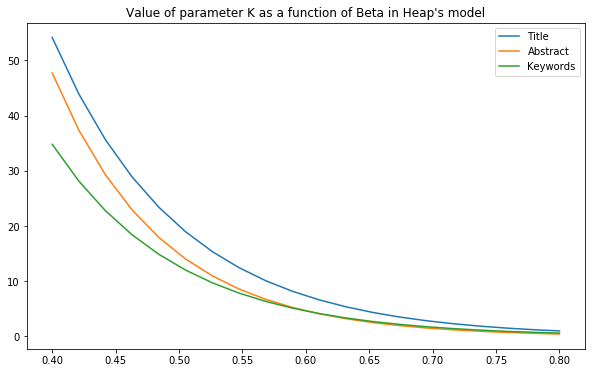

In [938]:
plt.figure(figsize=(10,6))
plt.title("Value of parameter K as a function of Beta in Heap's model")
plt.plot(np.linspace(0.4,0.8,20), 1/(21428**np.linspace(0.4,0.8,20)/2925), label='Title')
plt.plot(np.linspace(0.4,0.8,20), 1/(113167**np.linspace(0.4,0.8,20)/5015), label='Abstract')
plt.plot(np.linspace(0.4,0.8,20), 1/(24315**np.linspace(0.4,0.8,20)/1977), label='Keywords')
plt.legend()

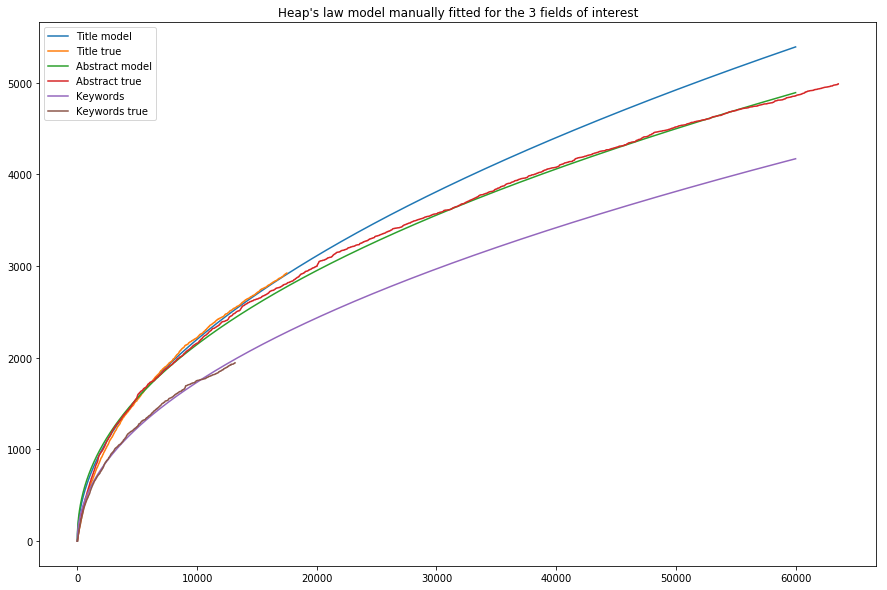

In [993]:
plt.figure(figsize=(15,10))
plt.title("Heap's law model manually fitted for the 3 fields of interest")
plt.plot(np.linspace(0,6e4,2e4),22*np.linspace(0,6e4,2e4)**0.50 , label='Title model')
plt.plot(vocabulary(Info,'.T clean')[2],label='Title true')
plt.plot(np.linspace(0,6e4,2e4),31*np.linspace(0,6e4,2e4)**0.460 , label='Abstract model')
plt.plot(vocabulary(Info,'.W clean')[2], label='Abstract true')
plt.plot(np.linspace(0,6e4,2e4),19*np.linspace(0,6e4,2e4)**0.49 , label='Keywords')
plt.plot(vocabulary(Info,'.K clean')[2], label='Keywords true')
plt.legend()

#### 2-1-4 Estimation of vocabulary collection for 1 million tokens

In [947]:
print('cardinality of Title vocabulary for 1M tokens: ',22*1e6**0.5)
print('cardinality of Abstract vocabulary for 1M tokens: ',30*1e6**0.462)
print('cardinality of Keywords vocabulary for 1M tokens: ',19*1e6**0.49)

cardinality of Title vocabulary for 1M tokens:  22000.0
cardinality of Abstract vocabulary for 1M tokens:  17746.849025264226
cardinality of Keywords vocabulary for 1M tokens:  16548.30820916553


In [948]:
def frequency_count(Info,field):
    voc = {}
    for key,value in Info.items():
        try:
            for term in list(set(Info[key][field])):
                if term not in voc.keys():
                    voc[term] = 1
                else:
                    voc[term] += 1
        except KeyError:
            pass    
    return voc

#### 2-1-5 Frequency vs rank by field

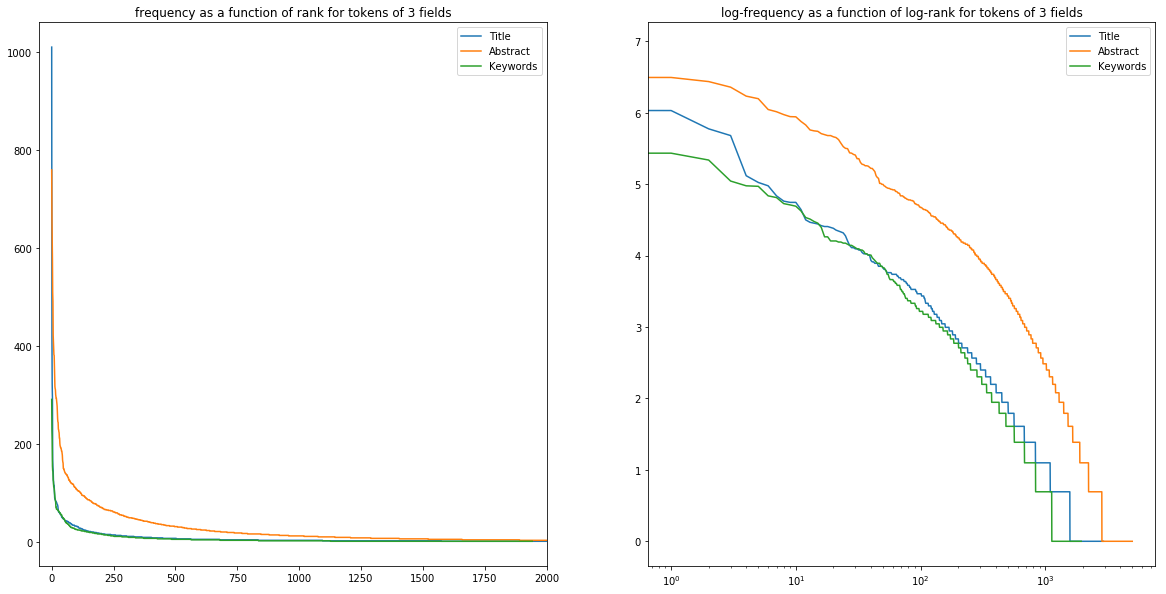

In [949]:
voc_freq_title = frequency_count(Info,'.T clean')
voc_freq_abstract = frequency_count(Info,'.W clean')
voc_freq_key = frequency_count(Info,'.K clean')
fig, a = plt.subplots(1,2,figsize=(20,10))
a[0].set_xlim([-50,2000])
a[0].set_title('frequency as a function of rank for tokens of 3 fields')
a[0].plot(sorted(voc_freq_title.values())[::-1], label='Title')
a[0].plot(sorted(voc_freq_abstract.values())[::-1],label='Abstract')
a[0].plot(sorted(voc_freq_key.values())[::-1],label='Keywords')
a[0].legend()
#a[1].set_xlim([-50,2000])
a[1].set_xscale('log')
a[1].set_title('log-frequency as a function of log-rank for tokens of 3 fields')
a[1].plot(np.log(sorted(voc_freq_title.values())[::-1]), label='Title')
a[1].plot(np.log(sorted(voc_freq_abstract.values())[::-1]),label='Abstract')
a[1].plot(np.log(sorted(voc_freq_key.values())[::-1]),label='Keywords')
a[1].legend()

### 2-2 Indexing

The main issue here is the choice of the data structure used to index the collection. Justify your choice.

**Answer** : In the context of Big Data, the use of a **sparse matrix** structure implemented in the *scipy* package in order to encapsulate the inverted index could be relevant as this structure relies on a C++ implementation that foster quick and stable computation. However, in our use case, the use of a **dictionnary class** from the collection package is sufficient and offers more flexibility and simplicity for the boolean model. For the vectorial and probabilistic model, we'll use a **numpy matrix** in order to store the weights of the model.

In [950]:
frequency_count(Info,'.T clean')

{'arccosin': 1,
 'replic': 1,
 'new': 28,
 'cyclic': 5,
 'fit': 43,
 'laguerr': 1,
 'sound': 1,
 'steep2': 1,
 '704': 1,
 'r2': 3,
 'poisson': 5,
 'tenex': 1,
 'relationship': 1,
 'larg': 19,
 'r176': 1,
 'independ': 8,
 'r352': 1,
 '406': 1,
 'confluent': 4,
 'viewpoint': 1,
 'begin': 1,
 'u': 5,
 'usual': 1,
 'median': 1,
 'center': 9,
 'autom': 13,
 '79': 3,
 'tester': 1,
 'password': 1,
 'eeg': 1,
 '115': 3,
 'extrem': 1,
 'spline': 11,
 'enumer': 8,
 '169': 2,
 'solver': 1,
 'boolean': 15,
 'advantag': 1,
 'field': 9,
 'outreal': 1,
 'rebutt': 1,
 'bisect': 2,
 'rollback': 1,
 'cybernet': 1,
 'mass': 1,
 'ultraviolet': 1,
 'sharer2': 1,
 'lightpen': 1,
 '156': 2,
 'situ': 3,
 'communic': 24,
 'aco': 1,
 'automata': 3,
 'cost': 10,
 'semiform': 1,
 '86': 2,
 'notat': 12,
 'satisfi': 2,
 'doubli': 2,
 'build': 1,
 'reduct': 15,
 'r400': 1,
 'enough': 2,
 'd2': 5,
 'reminisc': 1,
 'oper': 42,
 'triangular': 4,
 '197': 2,
 'correct': 22,
 '300': 4,
 'twin': 1,
 'procedur': 59,
 'a420'

#### Inverted_index class construction
It contains several methods for querying the CACM dataset:
>1-Boolean model

>2-Vectorial model with normalised tf-idf

>3-Probabilistic model

In [1080]:
from collections import defaultdict

class inverted_index:
    """
    Our class proposition for the inverted index
    """
    def __init__(self):
        self.inv_indx = defaultdict(list)
        
    """
    building index from pre-processed corpus
    """ 
        
    def frequency_count(self,Info,field):
        voc = {}
        for key,value in Info.items():
            try:
                for term in list(set(Info[key][field])):
                    if term not in voc.keys():
                        voc[term] = 1
                    else:
                        voc[term] += 1
            except KeyError:
                pass   
        self.voc_size = len(voc)
        return voc
        
    def frequency_count_one_doc(self, field):
        voc = {}
        field_len = len(field)
        for term in field:
            if term not in voc.keys():
                voc[term] = 1/field_len
            else:
                voc[term] += 1/field_len
        return voc   
    
    def build(self, Info, field):
        for key,value in Info.items():
            try:
                for term in Info[key][field]:
                    self.inv_indx[term].append(key)
            except KeyError:
                pass  
        self.Info = Info
        self.term_frequency = self.frequency_count(self.Info,field) 
        self.term_index = dict(zip(self.term_frequency.keys(),range(len(self.term_frequency))))
        
    """
    building tf_idf matrix
    
    """
        
    def build_term_frequency(self, field):
        self.tf = np.zeros((len(self.Info)+1,self.voc_size))
        for key,document in Info.items():
            voc = {}
            try:
                voc = self.frequency_count_one_doc(document[field])
                for term,freq in voc.items():
                    self.tf[int(key),int(self.term_index[term])]=freq                       
            except KeyError:
                pass  
            
    def build_idf(self, field):
        voc = {}
        for key,value in Info.items():
            try:
                for term in list(set(Info[key][field])):
                    if term not in voc.keys():
                        voc[term] = 1
                    else:
                        voc[term] += 1
            except KeyError:
                pass    
        self.idf = dict(zip([self.term_index[term] for term in voc], [np.log10(voc[term]) for term in voc]))
    
    def build_tf_idf(self, field):
        self.build_term_frequency(field)
        self.build_idf(field)
        for column,weight in self.idf.items():
            self.tf.T[column] = self.tf.T[column]*weight
        
    """
    Querying the index
    
    """
            
    def query_boolean(self,query):
        query = re.sub(r'[^a-zA-Z0-9_]', ' ', query.lower())
        keys = [terme for terme in re.split(' ',query) if terme not in stop]
        keys = [stemmer.stem(key) for key in keys]
        results = []
        negs = False
        AND = False
        OR = True
        for key in keys:
            if key == 'NOT':
                negs = True 
            elif key == 'AND':
                AND = True 
                OR = False
            elif key =='OR':
                AND = False
                OR = True
            else:
                try:
                    if OR == True and AND == False and negs == False:
                        results+=self.inv_indx[key]
                    elif OR == False and AND == True and negs == False:
                        results = [item for item in results if item in self.inv_indx[key]]
                    elif OR == True and AND == False and negs == True: 
                        results = [item for item in results if item not in self.inv_indx[key]]
                except KeyError:
                    pass
        return [Info[result]['.T'] for result in results]
    
    def query_vectorial(self, query,top):
        query = re.sub(r'[^a-zA-Z0-9_]', ' ', query.lower())
        keys = [terme for terme in re.split(' ',query) if terme not in stop]
        keys = [stemmer.stem(key) for key in keys]
        vector = np.zeros(self.voc_size)
        for key in keys:
            try:
                vector[self.term_index[key]]+=1
            except KeyError:
                pass
        vector = np.array(vector)
        score_query = {}
        for i in range(len(self.tf)):
            score_query[i] = vector.dot(self.tf[i])
        top_score = sorted(score_query.items(),key=lambda x: x[1])[::-1]
        
        #Printing best score 
        k=0
        results = []
        list_result = []
        while len(results)<top:
            k+=1
            try:
                results.append(self.Info[str(top_score[k][0])]['.T'])
                list_result.append(top_score[k][0])
            except KeyError:
                results.append('No title for this entry')
        return results, list_result
    
    def query_language_model(self, query,top):
        query = re.sub(r'[^a-zA-Z0-9_]', ' ', query.lower())
        keys = [terme for terme in re.split(' ',query) if terme not in stop]
        keys = [stemmer.stem(key) for key in keys]
        vector = np.zeros(len(self.term_frequency))
        for key in keys:
            try:
                vector[self.term_index[key]]+=1
            except KeyError:
                pass
        vector = np.array(vector)
        score_query = {}
        for i in range(len(self.tf)):
            score_query[i] = np.prod(self.tf[i][np.nonzero(vector)])/(np.count_nonzero(self.tf[i])**(len(keys)))
        top_score = sorted(score_query.items(),key=lambda x: x[1])[::-1]
        results = []
        k=0
        list_result = []
        while len(results)<top:
            k+=1
            try:
                results.append(self.Info[str(top_score[k][0])]['.T'])
                list_result.append(top_score[k][0])
            except KeyError:
                results.append('No title for this entry')
        return results, list_result
    

In [1081]:
inv_index = inverted_index()
inv_index.build(Info,'items clean')
inv_index.build_tf_idf('items clean')

#### Queries test

In [1082]:
inv_index.query_boolean('Matrices NOT Problem')[0:10]

['A Set of Matrices for Testing Computer Programs',
 'A Proposal for Definitions in ALGOL',
 'Characteristic Values and Vectors of Defective Matrices',
 'A Note on a Set of Test Matrices for Inversion',
 'One Way of Estimating Frequencies of Jumps in a Program',
 'Perturbations of Eigenvalues of Non-normal Matrices (Corrigendum)',
 'A Set of Test Matrices',
 'More Test Matrices for Determinants and Inverses (Pracnique)',
 'Algorithm for the Assignment Problem (Rectangular Matrices) [H] (Algorithm 415)',
 'Algorithm for the Assignment Problem (Rectangular Matrices) [H] (Algorithm 415)']

In [1083]:
inv_index.query_boolean('Matrices')[0:10]

['A Set of Matrices for Testing Computer Programs',
 'A Proposal for Definitions in ALGOL',
 'Characteristic Values and Vectors of Defective Matrices',
 'A Note on a Set of Test Matrices for Inversion',
 'One Way of Estimating Frequencies of Jumps in a Program',
 'Perturbations of Eigenvalues of Non-normal Matrices (Corrigendum)',
 'A Set of Test Matrices',
 'More Test Matrices for Determinants and Inverses (Pracnique)',
 'Algorithm for the Assignment Problem (Rectangular Matrices) [H] (Algorithm 415)',
 'Algorithm for the Assignment Problem (Rectangular Matrices) [H] (Algorithm 415)']

In [1084]:
inv_index.query_vectorial('Matrices inversion algorithm',10)

(['ROOTFINDER (Algorithm)',
  'Need for an Algorithm',
  'Matrix Inversion (Algorithm 231)',
  'Matrix Inversion (Algorithm 140)',
  'Matrix Inversion (Algorithm 58)',
  'Matrix Inversion (Algorithm 58)',
  'Matrix Inversion (Algorithm 58)',
  'Matrix Inversion(Algorithm 140)',
  'Matrix Inversion (Algorithm 58)',
  'Matrix Inversion (ALgorithm 58)'],
 [178, 29, 1060, 773, 566, 509, 508, 449, 423, 328])

In [1085]:
inv_index.query_vectorial('linear equation',10)

(['Translation Equations (Errata)',
  'Solution of the Matrix Equation AX+XB=C [F4] (Algorithm A432)',
  'Linear Equations, Exact Solutions (Algorithm 290 [F4])',
  'Solution of Tri-Diagonal Linear Equations (Algorithm 24)',
  'Solution of Simultaneous Non-Linear Equations (Algorithm 316[C5])',
  'Solution of simultaneous Linear Diophantine Equations (Algorithm 288 [F4])',
  'A Routine to Find the Solution of Simultaneous Linear Equations with Polynomial Coefficients',
  'Linear Equation Solver [F4] (Algorithm A423)',
  'Chebyshev Solution to an Overdetermined Linear System (Algorithm 328 [F4])',
  'Chebyshev Solution to an Overdetermined Linear System (Algorithm 328 [F4])'],
 [2063, 2284, 1370, 131, 1512, 1406, 89, 2362, 1880, 1734])

In [1086]:
inv_index.query_language_model('Algorithm',10)

(['STEEP2 (Algorithm 204)',
  'TREESORT1 (Algorithm 143)',
  'TREESORT2 (Algorithm 144)',
  'Need for an Algorithm',
  'Remark on Algorithm 475',
  'Hypergeometric (Algorithm C191)',
  'Maxflow (Algorithm R324)',
  'BANDSOLVE (Algorithm R195)',
  'Shuttlesort (Algorithm 175)',
  'Zersol (Algorithm 194)'],
 [745, 431, 430, 29, 2774, 2590, 2511, 2237, 1075, 790])

In [1087]:
inv_index.query_vectorial('policy',10)

(['A Simulation of Hospital Admission Policy',
  '   Reiteration of ACM Policy Toward Standardization',
  'A Problem-List of Issues Concerning Computers and Public Policy',
  'A Problem-List of Public Policy Issues Concerning Computers and Health Care',
  'Generalized Working Sets for Segment Reference Strings',
  'A Comparative Analysis of Disk Scheduling Policies',
  'A Policy-Driven Scheduler for a Time-Sharing System',
  '   Structures of Standards-Processing Organizations in the Computer Area',
  'Joining Policies in a Multipriority Multiclass Batch Computer System',
  'Maximum Computing Power and Cost Factors in the Centralization Problem'],
 [1426, 3195, 2607, 2756, 3067, 2375, 2219, 3197, 2878, 2387])

In [1088]:
inv_index.query_language_model('policy',10)

(['A Problem-List of Issues Concerning Computers and Public Policy',
  'A Problem-List of Public Policy Issues Concerning Computers and Health Care',
  '   Reiteration of ACM Policy Toward Standardization',
  'A Simulation of Hospital Admission Policy',
  '   Structures of Standards-Processing Organizations in the Computer Area',
  'A Scheduling Algorithm for a Computer Assisted Registration System',
  'Maximum Computing Power and Cost Factors in the Centralization Problem',
  'Overview of the EFT Symposium',
  'Joining Policies in a Multipriority Multiclass Batch Computer System',
  'Generalized Working Sets for Segment Reference Strings'],
 [2607, 2756, 3195, 1426, 3197, 2209, 2387, 3179, 2878, 3067])

### 3 - Evaluation on Benchmark

In [1114]:
with open('qrels.text') as f:
    data = f.readlines()
    ind={}
for i in range(len(data)):
    if int(data[i][:2]) in ind:
        ind[int(data[i][:2])].append(int(data[i][3:8]))
    else:
        ind[int(data[i][:2])]=[int(data[i][3:8])]
ind

{1: [1410, 1572, 1605, 2020, 2358],
 2: [2434, 2863, 3078],
 3: [1134, 1613, 1807, 1947, 2290, 2923],
 4: [1749, 1811, 2256, 2371, 2597, 2796, 2912, 3043, 3073, 3082, 3127, 3128],
 5: [756, 1307, 1502, 2035, 2299, 2399, 2501, 2820],
 6: [1543, 2078, 2828],
 7: [1198,
  1338,
  1877,
  1960,
  2150,
  2228,
  2256,
  2280,
  2320,
  2342,
  2376,
  2482,
  2578,
  2597,
  2618,
  2685,
  2700,
  2777,
  2865,
  2866,
  2895,
  2912,
  2941,
  3043,
  3082,
  3128,
  3141,
  3148],
 8: [2625, 2849, 3032],
 9: [2372, 2632, 2870, 2876, 3068, 3111, 3128, 3158, 3177],
 10: [46,
  141,
  392,
  950,
  1158,
  1198,
  1262,
  1380,
  1471,
  1601,
  1613,
  1747,
  1795,
  1811,
  2060,
  2150,
  2256,
  2289,
  2342,
  2376,
  2433,
  2618,
  2664,
  2685,
  2700,
  2714,
  2777,
  2785,
  2851,
  2895,
  2896,
  2912,
  3039,
  3075,
  3156],
 11: [1043,
  1188,
  1306,
  1358,
  1396,
  1491,
  1923,
  2246,
  2316,
  2527,
  2699,
  2710,
  2715,
  2716,
  2906,
  2923,
  2956,
  3073,
  3

In [1115]:
with open('qrels.text') as f:
    data = f.readlines()
data

['01 1410  0 0\n',
 '01 1572  0 0\n',
 '01 1605  0 0\n',
 '01 2020  0 0\n',
 '01 2358  0 0\n',
 '02 2434  0 0\n',
 '02 2863  0 0\n',
 '02 3078  0 0\n',
 '03 1134  0 0\n',
 '03 1613  0 0\n',
 '03 1807  0 0\n',
 '03 1947  0 0\n',
 '03 2290  0 0\n',
 '03 2923  0 0\n',
 '04 1749  0 0\n',
 '04 1811  0 0\n',
 '04 2256  0 0\n',
 '04 2371  0 0\n',
 '04 2597  0 0\n',
 '04 2796  0 0\n',
 '04 2912  0 0\n',
 '04 3043  0 0\n',
 '04 3073  0 0\n',
 '04 3082  0 0\n',
 '04 3127  0 0\n',
 '04 3128  0 0\n',
 '05 0756  0 0\n',
 '05 1307  0 0\n',
 '05 1502  0 0\n',
 '05 2035 0 0\n',
 '05 2299  0 0\n',
 '05 2399  0 0\n',
 '05 2501 0 0\n',
 '05 2820 0 0\n',
 '06 1543  0 0\n',
 '06 2078  0 0\n',
 '06 2828  0 0\n',
 '07 1198  0 0\n',
 '07 1338  0 0\n',
 '07 1877  0 0\n',
 '07 1960  0 0\n',
 '07 2150  0 0\n',
 '07 2228  0 0\n',
 '07 2256  0 0\n',
 '07 2280  0 0\n',
 '07 2320  0 0\n',
 '07 2342  0 0\n',
 '07 2376  0 0\n',
 '07 2482  0 0\n',
 '07 2578  0 0\n',
 '07 2597  0 0\n',
 '07 2618  0 0\n',
 '07 2685  0 0\

In [1116]:
with open('query.text') as f:
    data = f.read()  
split = re.split('.I ',data)
I ={}
for i, element in enumerate(split):
    I[i]={}
    lines = re.split('\n',element)
    for k,line in enumerate(lines):
        if line[0:2] in ['.W','.N']:
            j=1
            while k+j<len(lines):
                if len(lines[k+j])==0 or lines[k+j][0]!='.':
                    j+=1
                else:
                    break
            I[i][line[0:2]] = ''.join(lines[k+1:k+j])
for i in I.keys():
    try:
        I[i]['.I']= re.split('. ',I[i]['.N'])[0][1:]
    except KeyError:
        pass
I

{0: {},
 1: {'.I': '1',
  '.N': ' 1. Richard Alexander, Comp Serv, Langmuir Lab (TSS) ',
  '.W': ' What articles exist which deal with TSS (Time Sharing System), anoperating system for IBM computers?'},
 2: {'.W': ''},
 3: {'.I': '2',
  '.N': ' 2. Richard Alexander, Comp Serv, Langmuir Lab (author = Pooch or Prieve) '},
 4: {'.I': '3',
  '.N': ' 3. Donna Bergmark, Comp Serv, Uris Hall (intermed lang) ',
  '.W': ' Intermediate languages used in construction of multi-targeted compilers; TCOLL'},
 5: {'.W': " I'm interested in mechanisms for communicating between disjoint processes,possibly, but not exclusively, in a distributed environment. "},
 6: {'.I': '4', '.N': ' 4. Pavel Curtis (comm mech for disjoint processes)'},
 7: {'.I': '5',
  '.N': ' 5. Pavel Curtis (editing interfaces) ',
  '.W': " I'd like papers on design and implementation of editing interfaces,window-managers, command interpreters, etc.  The essential issues arehuman interface design, with views on improvements to user 

In [1132]:
for query in I.values():
    print('\n')
    try:
        print(query['.I'])
        print(query['.W'])
        print('\n','Results:')
        c=[int(key) for key in ind[int(query['.I'])]]
        a,b = inv_index.query_vectorial(query['.W'],len(c))
        print(a)
        print('index:', b)
        print('expected results : ',c)
        print('common : ',[int(i) for i in b if int(i) in c])
    except KeyError:
        pass





1
 What articles exist which deal with TSS (Time Sharing System), anoperating system for IBM computers?

 Results:
['An Imaginary Number System', 'An Imaginary Number System', 'Computers and Education', 'Sorting on Computers', 'Discussion Summary on Operating Systems']
index: [294, 197, 1107, 866, 1461]
expected results :  [1410, 1572, 1605, 2020, 2358]
common :  []




2


3
 Intermediate languages used in construction of multi-targeted compilers; TCOLL

 Results:
['GARGOYLE , A Language for Compiler Writing*', 'Compiling Connectives', 'Glossary Construction', 'Another use of FORTRAN ', 'Note on the Use of Procedures ', '   Semiotics and Programming Languages']
index: [1149, 187, 929, 952, 948, 3188]
expected results :  [1134, 1613, 1807, 1947, 2290, 2923]
common :  []




4


5
 I'd like papers on design and implementation of editing interfaces,window-managers, command interpreters, etc.  The essential issues arehuman interface design, with views on improvements to user efficienc

['Discussion Summary on Operating Systems', 'Bitwise Operations', 'A Formal System for Information Retrieval from Files', 'An Imaginary Number System', 'An Imaginary Number System', 'Modular Data Processing Systems Written in COBOL', 'Monitors: An Operating System Structuring Concept (Corrigendum)', 'Proceedings of the ACM Symposium on Operating system Principles', 'Some Thoughts on Parallel Processing', 'Compiling Matrix Operations', 'On Programming of Arithmetic Operations', 'The Property Classification Method of File Design and Processing', 'Processing Magnetic Tape Files with Variable Blocks', 'A Generational Perspective of Information System Development', 'A Catalogue Entry Retrieval System', 'The BKS System for the Philco-2000 ', 'Simulation and Analysis of Biochemical Systems']
index: [1461, 379, 2070, 294, 197, 597, 2796, 1755, 141, 437, 17, 493, 240, 2311, 798, 391, 238]
expected results :  [1746, 1749, 1828, 1854, 1960, 2070, 2114, 2342, 2376, 2378, 2500, 2632, 2817, 2912, 30

['Discussion Summary on Operating Systems', 'Bitwise Operations', 'An Imaginary Number System', 'An Imaginary Number System', 'Monitors: An Operating System Structuring Concept (Corrigendum)', 'Proceedings of the ACM Symposium on Operating system Principles', 'Compiling Matrix Operations', 'On Programming of Arithmetic Operations', 'Over-all Computation Control and Labelling', 'Mechanical Pragmatics: A Time-Motion Study of a Miniature Mechanical Linguistic System', 'On-Line Digital Computer for Measurement of a Neurological Control System', 'A Catalogue Entry Retrieval System', 'The BKS System for the Philco-2000 ', 'Simulation and Analysis of Biochemical Systems', 'Bendix G-20 System', 'General Purpose Programming Systems', 'Simple Automatic Coding Systems', 'A Numbering Systems for Combinations', "Further Comments on Dijkstra's Concurrent Programming Control Problem", 'Additional Comments on a Problem in Concurrent Progamming Control', 'A Generational Perspective of Information Syste

['Sorting on Computers', 'Complexity of Computations (Corrigendum)', 'Computer Programming as an Art', 'Programming of Digital Computers', 'On Introducing Digital Computing', 'Logic for the Computer Sciences ', 'Designing a Computer Center', 'Computer Patent Disclosures', 'Joint Inventorship of Computers', 'Computer Programs are Patentable', 'Computer Planned Collates', 'Analytic Differentiation By Computer', 'Evaluation of Polynomials by Computer', 'Over-all Computation Control and Labelling', 'Note on Eigenvalue Computation', 'An Educational Program in Computing ', 'Central-European Computers', 'Impact of Computer Developments', 'Tables for Automatic Computation', 'A Computer Technique for Handling Analysis of Variance', 'Another Comment on Computer Music', 'Computer Science-A Vicious Circle', 'Patent Protection of Computer Programs', 'CORC-The Cornell Computing Language', 'A Computer Program for Editing the News', 'Group Participation Computer Demonstration', 'Simulation of Computer

['Note on the Use of Procedures ', 'A Variant Method of File Searching', 'Inefficiency of the Use of Boolean Functions for Information Retrieval Systems', 'Use of Semantic Structure in Information Systems', 'Still Another Use for FORTRAN ', 'Use of MOBOL in PreparingRetrieval Programs', 'The Use of Computers in Inspection Procedures', 'A Formal System for Information Retrieval from Files', "On Foster's Information Storage and Retrieval Using AVL Trees", 'The Use of Digital Computers in Western Germany', 'A Note on the Use of the Abacus in Number Conversion', 'Information Structures for Processing and Retrieving', 'Manipulation of Trees in Information Retrieval*', 'A Suggested Method of Making Fuller Use of Strings in ALGOL 60', 'A New Method of Computation of Square Roots Without Using Division', 'A New Method of Computation of Square Roots Without Using Division', 'Fibonaccian Searching', 'Sorting Nonredundant Files-Techniques Used in the FACT Compiler', 'The Use of Cobol Subroutines 

In order to evaluate our search engine given the benchmark of queries that is provided with the CACM dataset, we can define precision and recall as they provide insights about the relevance of our returned entries and the ranking of our results.

In [1167]:
def average_recall_and_precision_vectorial(I, threshold): 
    recall = []
    precision = []
    for query in I.values():
        try:
            c=[int(key) for key in ind[int(query['.I'])]]
            a,b = inv_index.query_vectorial(query['.W'],threshold)
            recall.append(len([int(i) for i in b if int(i) in c])/len(c))
            precision.append(len([int(i) for i in b if int(i) in c])/threshold)
        except KeyError:
            pass
    return np.mean(np.array(recall)),np.mean(np.array(precision))


def average_recall_and_precision_language(I, threshold): 
    recall = []
    precision = []
    for query in I.values():
        try:
            c=[int(key) for key in ind[int(query['.I'])]]
            a,b = inv_index.query_language_model(query['.W'],threshold)
            recall.append(len([int(i) for i in b if int(i) in c])/len(c))
            precision.append(len([int(i) for i in b if int(i) in c])/threshold)
        except KeyError:
            pass
    return np.mean(np.array(recall)),np.mean(np.array(precision))


list_score_vec=[]
list_score_lang=[]
for thresh in np.linspace(1,200,20):
    list_score_vec.append(average_recall_and_precision_vectorial(I,int(thresh)))
    list_score_lang.append(average_recall_and_precision_language(I,int(thresh)))
    print(list_score_vec[-1])
    print(list_score_lang[-1])
list_score_vec = np.array(list_score_vec)    
list_score_lang = np.array(list_score_lang)   

(0.003314393939393939, 0.045454545454545456)
(0.002715466351829988, 0.045454545454545456)
(0.019095638201211417, 0.03099173553719008)
(0.0169803458573512, 0.028925619834710745)
(0.05345652995926097, 0.032467532467532464)
(0.01956299048545038, 0.017316017316017316)
(0.09012619844007497, 0.03480113636363636)
(0.02264256673575834, 0.01278409090909091)
(0.12126517380848387, 0.036255411255411256)
(0.026498119784859775, 0.012445887445887448)
(0.1345180446965368, 0.03344768439108062)
(0.03538992242666241, 0.012006861063464836)
(0.16461571388497886, 0.03427128427128427)
(0.04943811525704205, 0.012987012987012986)
(0.18210297002779097, 0.033476658476658476)
(0.0672108212628859, 0.012899262899262898)
(0.22096613234135828, 0.03273809523809524)
(0.0718963166460557, 0.012445887445887443)
(0.23201879677552065, 0.03110047846889952)
(0.07542152569493762, 0.011722488038277513)
(0.26118595661825433, 0.030952380952380957)
(0.07675842409065955, 0.010822510822510824)
(0.301854319088303, 0.03095611285266457

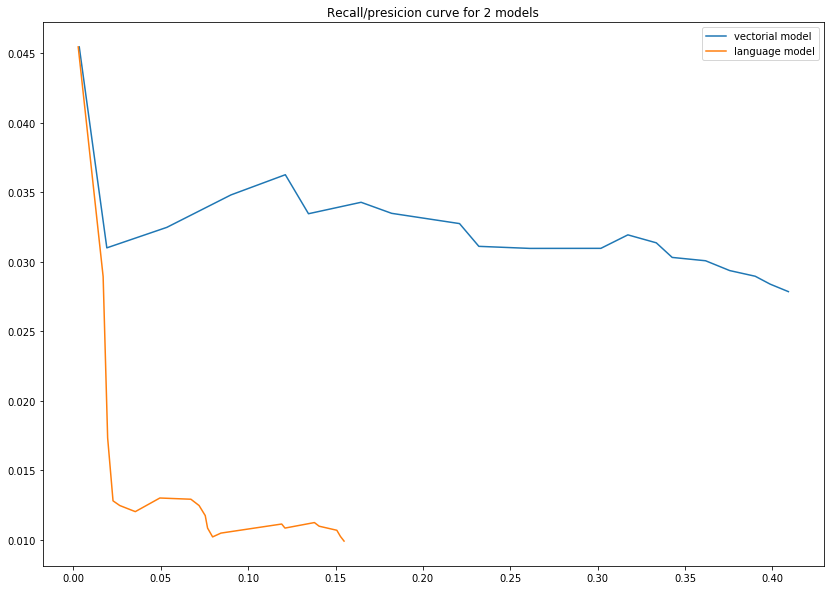

In [1170]:
plt.figure(figsize=(14,10))
plt.title('Recall/presicion curve for 2 models')
plt.plot(list_score_vec.T[0],list_score_vec.T[1],label='vectorial model')
plt.plot(list_score_lang.T[0],list_score_lang.T[1],label='language model')
plt.legend()

**Note**: Even tough the manual searches performed to test the search engine showed good results, it seems that precision and recall are rather bad on the benchmark. This might be due to the high technicality of the corpus, as well as the confusing and non-informative words used in the queries. In order to further improve the search engine, we could for instance define a threshold below which a vectorial or probabilistic vector should not be returned.That would also allow us to define the precision and recall score ouf our search engine for a given number of returned queries. Also, we could work on the list of stopwords used to further filter the queries. Finally, more sophisticated vectorial models, such as word2vec could be used in order to better capture the meaning of queries. 